### 3.2 Means of tenure among five aged groups

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
from  scipy import stats
from statsmodels.formula.api import ols
import plotly.figure_factory as ff


data=pd.read_csv(r"C:\Users\DAVID SEO\Desktop\data_practice\facebook\pseudo_facebook.csv")
data.head()


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [117]:
#Droping all the missing values
data=data.dropna()

In [118]:
#Creating the age_group
labels=['13-19 yaer','20-34 year','35-49 year','50-65 year','over 65 year']
#labeling each group and store it unser the column called 'age_group'
#Alternatively
#recording value from numeric to string
data['age_group']=pd.cut(data.age,bins=[12,19,34,49,65,data.age.max()],labels=[1,2,3,4,5])

#Gain the summary of statistics
rp.summary_cont(data.age)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age,98826.0,37.212646,22.52422,0.07165,37.072214,37.353079


###  step 1. Anova with statsmodels

H0: No difference between means, i.e. x1 = x2 = x3
Ha: Difference between means exist somewhere, i.e. x1=x2 x3 or x1 = x2≠ x3, or x1≠x2 = x3

１．Normality

２．Caveat to this is, if group sizes are equal, the F-statistic is robust to violations of normality

３．Homogeneity of variance


If possible, it is best to have groups the same size so corrections to the data do not need to be made. However, with real world data, that is often not the case and one will have to make corrections to the data. If these assumptions are not met, and one does not want to transform the data, an alternative test that could be used is the Kruskal-Wallis H-test or Welch’s ANOVA.

Furthermore,like the paired t-test, we should check if the data is satisfyin the normal assumption. This checking process wil be more simple and easy if you use statsmodels. But, there are some precautions you should pay attention to. 
First, enter the model as a regression formula 
Second,if you dummy code the gorups, you have to not include the first group into the formual.This group's data get capture in the
intercept of modeland is the base(group). If you use the following code, you do not have to get this done manually but python can
take care.


In [107]:
#a function to set the sample sizes of groups to the minimum 
import itertools
def set_sample_size(x):
    groups=[]
    for i in range(1,6):
        if i==1:
            minimum=len(x[x.age_group==i])
            idx=1 #idx represents the number of group with minimum sample size
        else:
            if minimum>len(x[x.age_group==i]):
                minimum=len(x[x.age_group==i])
                idx=i
            else:
                minimum=minimum
    for i in range(1,6):
        if i==idx:
            groups.append(list(x[x.age_group==i].loc[:,'tenure']))
        else:
            groups.append(list(x[x.age_group==i].loc[:,'tenure'].sample(minimum)))
    merged_groups=list(itertools.chain.from_iterable(groups)) #joining the list of groups 
    return {0:idx,1:minimum,2:groups,3:merged_groups}
result=set_sample_size(data)
matrix=[['Group number having the miminum size','Miminum Sample Size','Total Number of Merged groups'],[result[0],result[1],len(result[3])]]
ff.create_table(matrix).show()

In [108]:
from statsmodels.formula.api import ols
reg=ols('tenure~C(age_group)',data=data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 tenure   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     6471.
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        00:20:12   Log-Likelihood:            -7.3341e+05
No. Observations:               98826   AIC:                         1.467e+06
Df Residuals:                   98821   BIC:                         1.467e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           360.3374      2.792    129.066      0.000     354.865     365.810
C(age_group)[T.2]    64.3093      3.466     18.557      0.000      57.517      71.102
C(age_group)[T.3]   155.5194      4.404     35.311      0.000     146.887     164.152
C(age_group)[T.4]   399.7289      4.402     90.803      0.000     391.101     408.357
C(age_group)[T.5]   645.1229      4.783    134.890      0.000     635.749     654.497
==============================================================================
Omnibus:                    16137.694   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31188.136
Skew:                           1.013   Prob(JB):                         0.00
Kurtosis:                       4.862   Cond. No.                         5.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  step 2. Checking normality

Just like the case of paired t-test, we will walk through three ways to see if the residual is following the normality condition. 

1) qqplot

2) Kolmogrove Sminorve Test

3) Shapiro Test

#### 1) Q-Q plot

Text(0.5, 1.0, 'Normal Q-Q plot')

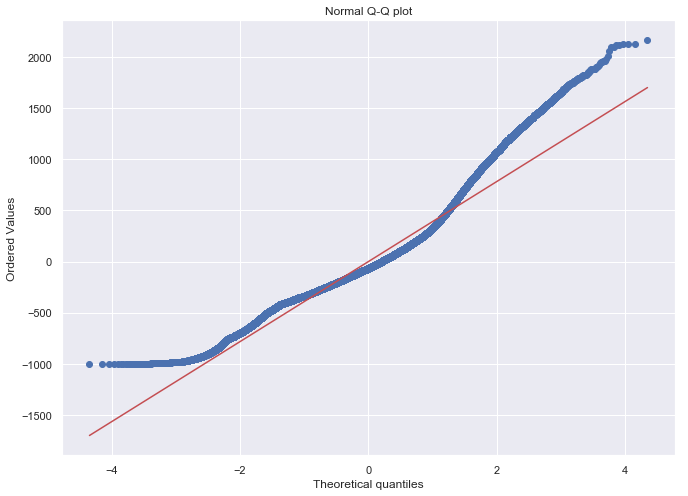

In [119]:
sns.set()
fig,ax=plt.subplots(figsize=(11,8))
stats.probplot(reg.resid,dist='norm',plot=ax)
ax.set_title("Normal Q-Q plot")

#### Comments:

In the left tail, the dots  creep above the line indicating that they are not as extreme as would be expected under the normal distribtuion. On the other hand, larger values are much more extrem than we would see under the normality. This clearly explains that they have a heavy right tail. 


### 2) Kolmogrove Sminorve and Shapiro Test

In [121]:
import plotly.figure_factory as ff

def judgement(p_value,alpha):
    if p_value>alpha:
        comment='Fail to reject null'
    else:
        comment='Reject null'
    return comment


def test_matrix(x):
    matrix=[['Type','Test Statics','Significance Level','P-value','Comment']]
    for i in range(2):
        if i==0:
            test='Shapiro_test'
            statics,p_value=stats.shapiro(x)
        else:
            test='Kolmogrove_test'
            statics,p_value=stats.kstest(x,'norm')
        alpha=0.05
        comment=judgement(p_value,alpha)
        matrix.append([test,statics,alpha,p_value,comment])
    return matrix

table=ff.create_table(test_matrix(reg.resid))
table.show()

C:\Users\DAVID SEO\anaconda\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning:

p-value may not be accurate for N > 5000.



#### Commments:
None of tests suggest that the residual is fllowing the normal distribution.Therfore, we are better off not using parametric test for finding the differnce between  means of tenure in five groups. For accurate analysis, alternative tests to the ANOVA is called for. 
The most commonly used one is Kruscal-Wallis Test. 



### step 3) Kruscal-Wallis Test

Now,we should formulate null and alternative hypotehsis as it follows below.

H0:The five Groups have the same median

HA: not H0


Note that the test works on 2 or more independent samples, which may have different sizes. 




In [122]:
groups=[]
for i in range(1,6):
    groups.append(data.loc[data.age_group==i,'tenure'])
stat,p_value=stats.kruskal(*groups) #unpack the list as a sequence of arguments to 'stats.kruskal'
comment=judgement(p_value,0.05)
matrix=[['Type','Test Statics','Significance Level','P-value','Comment']]
matrix.append(['Kruskall-Wallis',stat,0.05,p_value,comment])
table=ff.create_table(matrix)
table.show()

#### _Comment_

Now,we reach a conclusion that samples in all groups drwan from the population do not have the same mean value. Then you are now convinced that there exists difference of means of tenure among the five groups. Which group have a significant different mean value from another? To answer this qeustion,  you may consider doing multiple comparisions - to examine possible combination of a pair of groups where one is treateted as a reference and the others as treatment. The outcome is no more than a result of chance but is considered significant. 


#### _Multiple Comparisions and Its Problems_

Multiple comparisions are the most classical test for identifying the differnce in means of condition in various groups. However, it has its own dismeritness. That is, the possibility of error rate as a result of multiple numbers of testing. That is, even if the null hypothesis is actually true, due to increased number of testing could lead to making the reuslt significant. 

The cost, in time, effort and perhaps money, could be quite high if you based important conclusions on these false positives, and it would at least be embarrassing for you once other people did further research and found that you'd been mistaken.

#### _Solutions and Bofferoni Correction_

Even thouh there is no universally accepted approach for dealing with the problem of multiple comparisons, it is a commoly done practice that you use either a lower critical value  or adjust the pvalue to the higher if you decide not change the critical value (ie the more comparisons the greater p-value modification is made)


The Bonferroni correction is appropriate when a single false positive in a set of tests would be a problem. It is mainly useful when there are a fairly small number of multiple comparisons and you're looking for one or two that might be significant. However, if you have a large number of multiple comparisons and you're looking for many that might be significant, the Bonferroni correction may lead to a very high rate of false negatives. For example, let's say you're comparing the expression level of 20,000 genes between liver cancer tissue and normal liver tissue. Based on previous studies, you are hoping to find dozens or hundreds of genes with different expression levels. If you use the Bonferroni correction, a P value would have to be less than 0.05/20000=0.0000025 to be significant. Only genes with huge differences in expression will have a P value that low, and could miss out on a lot of important differences just because you wanted to be sure that your results did not include a single false positive.






### 3.3 Correlation

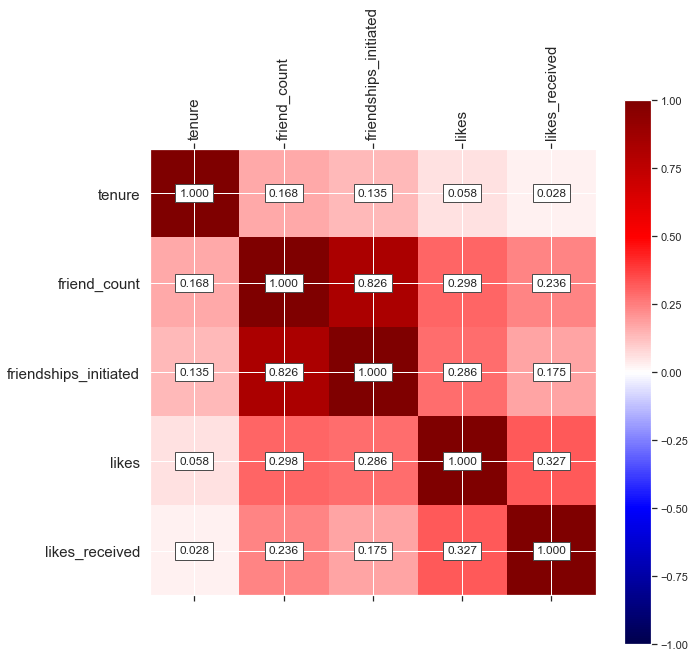

In [123]:
corr=data.iloc[:,6:11].corr()
fig,ax=plt.subplots(figsize=(10,10))
cax=ax.matshow(corr,cmap='seismic',vmin=-1,vmax=1)
fig.colorbar(cax)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(data.iloc[:,6:11].columns,fontsize=15,rotation=90)
ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(data.iloc[:,6:11].columns,fontsize=15)
length=len(corr)
for i in range(length):
    for j in range(length):
          ax.text(i,j,'{:0.3f}'.format(corr.iloc[i,j]),
           ha='center', va='center',bbox=dict(facecolor='white', edgecolor='0.3'))


### Comments

The majority of correlations between variables are somewhere between 0 and 0.4,from which we can infer that there is a relatively weak relationship. Howerver, the one that stands out is the relationship between friend count and friendships_intitiated proven to be quite strong.Let's take a stastical test to see if the realtion is sustable or by chance. 


### Correlation Analysis 

We wil go through three major tests to determine wether the correlation is statistically significant. One of them is peason,one of the parametric tests. Just like other typical parametric tests, peasron requires that each dataset be normally distributed. Thereofer,we need to check if our selected data is follwoing the normal distriubtion . If it does, we will proceed the pearson.Othwerwise, we just skip it and perform the rest of tests.


### Test for Normality

1. QQ plot

2. Shapiro test

3. Kolomogrove Sminorve test

Text(0.5, 1.0, 'QQ plot : after log-transfomration of friendship_initiated')

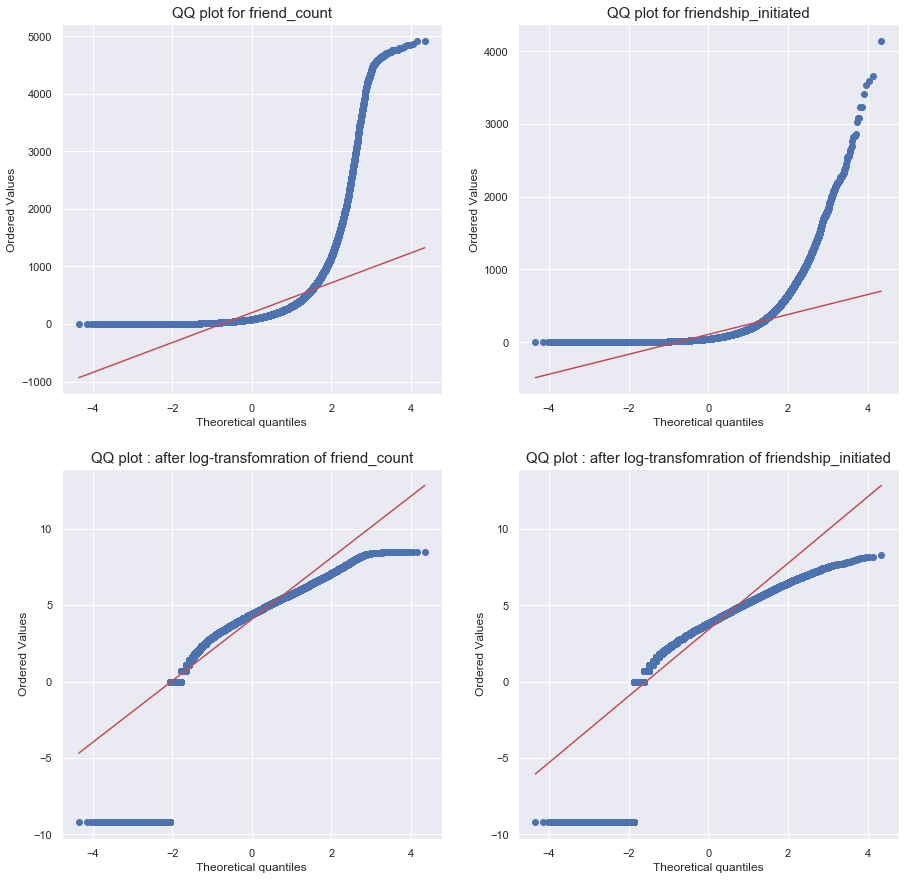

In [124]:
## qq plot

friend_count=data.loc[:,'friend_count']
friend_initiated=data.loc[:,'friendships_initiated']


fig,axes=plt.subplots(2,2,figsize=(15,15))
stats.probplot(friend_count,dist='norm',plot=axes[0,0])
axes[0,0].set_title("QQ plot for friend_count",fontsize=15)
stats.probplot(friend_initiated,dist='norm',plot=axes[0,1])
axes[0,1].set_title('QQ plot for friendship_initiated',fontsize=15)
    
## log_transfomration -making asymmetric set of data less skew
def log_transfomration(x):
    if x ==0:
        x=0.0001
    return np.log(x)

log_friend_count=data.loc[:,'friend_count'].apply(log_transfomration)
log_friend_initiated=data.loc[:,'friendships_initiated'].apply(log_transfomration)

##drawing qqplt

stats.probplot(log_friend_count,dist='norm',plot=axes[1,0])
axes[1,0].set_title("QQ plot : after log-transfomration of friend_count",fontsize=15)
stats.probplot(log_friend_initiated,dist='norm',plot=axes[1,1])
axes[1,1].set_title('QQ plot : after log-transfomration of friendship_initiated',fontsize=15)

### Shapiro and Kolomogrove Sminorve Test

In [125]:
name={'friend_count':friend_count,'friend_initated':friend_initiated}

def judgement(p_value,alpha):
    if p_value>alpha:
        comment='Fail to reject null'
    else:
        comment='Reject null'
    return comment
    
def test_result(x):#input need to be 'dict'typed
    results=[['Name','Test type','Significance Level','Test Statistcs','p_value','Comment']]
    for idx,key,values in zip(range(4),name.keys(),name.values()):
        data_name=key
        alpha=0.05
        test_type='Shapiro'
        statistics,p_value=stats.shapiro(values)
        comment=judgement(p_value,alpha)
        results.append([data_name,test_type,alpha,statistics,p_value,comment])
        test_type='KS test'
        statistics,p_value=stats.kstest(values,'norm')
        comment=judgement(p_value,alpha)
        results.append([data_name,test_type,alpha,statistics,p_value,comment])
    return(results)

colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']] #[[0, 'Header_Color'],[.5, 'Odd_Row_Color'],[1, 'Even_Row_Color']]
table=ff.create_table(test_result(name),colorscale=colorscale)
table.show()


C:\Users\DAVID SEO\anaconda\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning:

p-value may not be accurate for N > 5000.

C:\Users\DAVID SEO\anaconda\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning:

p-value may not be accurate for N > 5000.



###  Non parametric test

In [115]:
test_type=['Kendall','Spearman']
results=[["Test Type","Significance Level","Test Statics","p_value","Comment"]]
for idx,name in enumerate(test_type):
    test=name
    alpha=0.05
    if idx==0:
        stat,p_value=stats.spearmanr(friend_count,friend_initiated)
    else:
        stat,p_value=stats.kendalltau(friend_count,friend_initiated)
    comment=judgement(p_value,alpha)
    results.append([test,alpha,stat,p_value,comment])
    
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]
table=ff.create_table(results,colorscale=colorscale)
table.show()


### Test Result

H0 : Samples are uncorrelated.

H1 : Not H0

Since both tests agree that there exists a statistically significant relation between two vairables, we can reach a conclusion
that the correlation is statistcally significant.If you have a lot of online firends, you are more likely to have a highe level of friendship_initiated vice versa. 
